In [9]:
import pandas as pd
import numpy as np

index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                                    [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

ser_obj = pd.Series(np.random.randn(12), index=index1)
print(ser_obj)
print("-" * 100)
df_obj = ser_obj.unstack(0)
print(df_obj)
print("-" * 100)
df_obj.loc[0, 'b'] = np.nan
print(df_obj)
print("-" * 100)
print(df_obj.min(axis=0))

cloth  size
a      0       1.370391
       1       2.022247
       2       0.301479
b      0       0.853023
       1      -0.478473
       2      -0.085954
c      0       0.452751
       1      -0.047940
       2      -0.213750
d      0       0.537445
       1      -0.488494
       2       1.730350
dtype: float64
----------------------------------------------------------------------------------------------------
cloth         a         b         c         d
size                                         
0      1.370391  0.853023  0.452751  0.537445
1      2.022247 -0.478473 -0.047940 -0.488494
2      0.301479 -0.085954 -0.213750  1.730350
----------------------------------------------------------------------------------------------------
cloth         a         b         c         d
size                                         
0      1.370391       NaN  0.452751  0.537445
1      2.022247 -0.478473 -0.047940 -0.488494
2      0.301479 -0.085954 -0.213750  1.730350
-----------------------

In [10]:
df_obj

cloth,a,b,c,d
size,,,,
0,1.370391,NaN,0.452751,0.537445
1,2.022247,-0.478473,-0.047940,-0.488494
2,0.301479,-0.085954,-0.213750,1.730350


In [11]:
# 观察数据分布的一种 非常常用的方法
print(df_obj.describe())

cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean   1.231372 -0.282214  0.063687  0.593100
std    0.868767  0.277553  0.346989  1.110468
min    0.301479 -0.478473 -0.213750 -0.488494
25%    0.835935 -0.380343 -0.130845  0.024476
50%    1.370391 -0.282214 -0.047940  0.537445
75%    1.696319 -0.184084  0.202405  1.133898
max    2.022247 -0.085954  0.452751  1.730350


In [12]:
df_obj.loc[:, 'c']

size
0    0.452751
1   -0.047940
2   -0.213750
Name: c, dtype: float64

In [13]:
# 计算最小值或最大值的索引的位置
print(df_obj.loc[:, 'c'].argmin())  # argmin和argmax只能是Series，不能是DataFrame


2


In [14]:
df_obj

cloth,a,b,c,d
size,,,,
0,1.370391,NaN,0.452751,0.537445
1,2.022247,-0.478473,-0.047940,-0.488494
2,0.301479,-0.085954,-0.213750,1.730350


In [15]:
# 返回的是一个Series，包含每列的最小值
df_obj.idxmin(axis=0, skipna=True)

cloth
a    2
b    1
c    2
d    1
dtype: int64

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)
print(df.info())  # 查看数据信息
print("-" * 100)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
----------------------------------------------------------------------------------------------------


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [17]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# 任务：统计这1000部电影有多少导演和演员

In [27]:
# 获取平均评分
print(df['Rating'])
print("-" * 100)
# 导演人数
print(len(set(df['Director'].tolist())))
print(len(df['Director'].unique()))  # 推荐用这种方式
print("-" * 100)

# 演员人数
# temp_actors_list = df['Actors']
temp_actors_list = df['Actors'].str.split(',').tolist()
print(temp_actors_list)

0      8.1
1      7.0
2      7.3
3      7.2
4      6.2
      ... 
995    6.2
996    5.5
997    6.2
998    5.6
999    5.3
Name: Rating, Length: 1000, dtype: float64
----------------------------------------------------------------------------------------------------
644
644
----------------------------------------------------------------------------------------------------
0      Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
1      Noomi Rapace, Logan Marshall-Green, Michael Fa...
2      James McAvoy, Anya Taylor-Joy, Haley Lu Richar...
3      Matthew McConaughey,Reese Witherspoon, Seth Ma...
4      Will Smith, Jared Leto, Margot Robbie, Viola D...
                             ...                        
995    Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...
996    Lauren German, Heather Matarazzo, Bijou Philli...
997    Robert Hoffman, Briana Evigan, Cassie Ventura,...
998    Adam Pally, T.J. Miller, Thomas Middleditch,Sh...
999    Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...

In [28]:
actors_list = [i for j in temp_actors_list for i in j]  # 二維展为一维
actors_num = len(set(actors_list))
print(actors_num)

2394


In [29]:
# 想知道每个演员出演的电影数量
u, indices = np.unique(actors_list, return_counts=True)
print(u)
print(indices)

[' 50 Cent' ' A.C. Peterson' ' AJ Michalka' ... 'Zachary Quinto'
 'Zoey Deutch' 'Zooey Deschanel']
[1 1 1 ... 1 4 2]


# 8.3.1 电影时长的关系

[121 124 117 108 123 103 128  89 141 116 133 127 133 107 109  87 139 123
 118 116 120 137 108  92 120  83 159  99 100 115 111 116 144 108 107 147
 169 115 132 113  89 111  73 115  99 136 132  91 122 130 136  91 118 101
 152 161  88 106 117  96 151  86 112 125 130 129 133 120 106 107 133 124
 108  97 108 169 143 153 151 116 148 118 180 149 137 124 129 162 187 128
 153 123 146 114 141 116 106  90 105 151 132 115 144 106 116 102 120 110
 105 108  89 134 118 117 130 105 118 161 104  97 127 139  98  86 164 106
 165  96 108 156 139 125  86 107 130 140 122 143 138 148 127  94 130 118
 165 144 104 162 113 121 117 142  88 121  91  94 131 118 112 121 106  90
 132 118 144 122 129 109 144 148 118 101  84 126 102 130 130 107 134 117
 118  92 105 112 124 135 113 119 100 125 133  94 128  92 140 124  95 148
 114 107 113 146 134 126 120 132  99 118 125 111 114  94 144 104 112 126
 136 104 100 117  96 117 100 158 110 163 119 107  97 102 118  95 139 131
 114 102 100  85  99 125 134  95  90 126 118 158 10

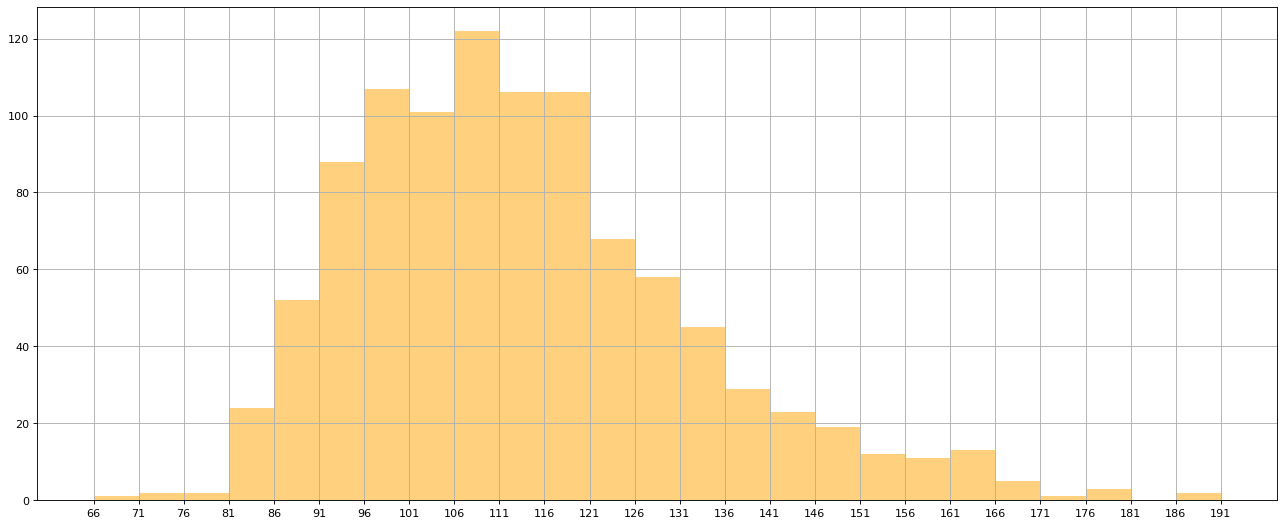

In [47]:
# rating, runtime分布情况
# 选择图形，直方图
# 准备数据

runtime_data = df['Runtime (Minutes)'].values
print(runtime_data)
print("-" * 100)
max_runtime = np.max(runtime_data)
min_runtime = np.min(runtime_data)
print(max_runtime, min_runtime)
print("-" * 100)
num_bin = (max_runtime - min_runtime) // 5
print(num_bin)
print("-" * 100)
# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# bins代表将数据划分为几个等级，每个等级都代表一个区间范围
plt.hist(runtime_data, bins=num_bin, color='orange', alpha=0.5)
plt.grid(True)
plt.xticks(range(min_runtime, max_runtime + 5, 5))
plt.show()

In [52]:
# 电影评分的分布情况
# 获取平均评分
print(df["Rating"].mean())
# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Rating"].values
# print(runtime_data)
print(type(runtime_data))
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print("-" * 100)
print(max_runtime, min_runtime)  # 最高分和最低分

6.723200000000003
<class 'numpy.ndarray'>
----------------------------------------------------------------------------------------------------
9.0 1.9


最大评分减去最小评分：7.1
组数为：14.0


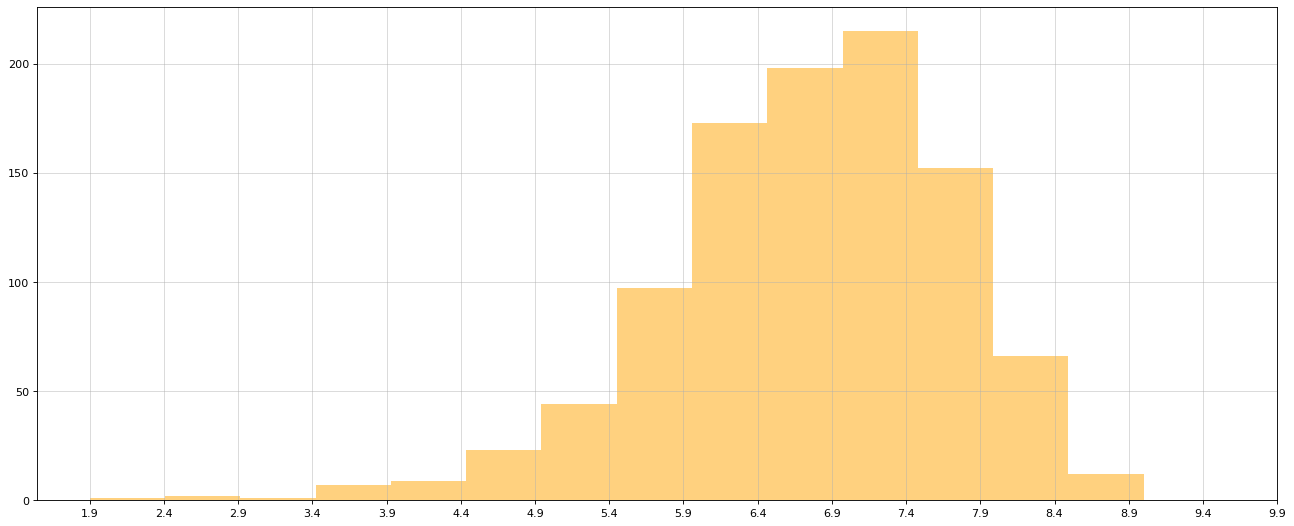

In [54]:
# 计算数组
print(f"最大评分减去最小评分：{max_runtime - min_runtime}")
num_bin = (max_runtime - min_runtime) // 0.5

print(f"组数为：{num_bin}")

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, bins=int(num_bin), color='orange', alpha=0.5)
plt.grid(True, alpha=0.5)

# 因为range的步长不支持0.5，自己做一个列表
_x = [min_runtime]
i = min_runtime
while i <= max_runtime + 0.5:
    i += 0.5
    _x.append(i)

plt.xticks(_x)
plt.show()



# 8.3.3 导演要拍什么题材电影

In [61]:
print(df['Genre'].head())
print("-" * 100)
print(type(df['Genre'][1]))
print("-" * 100)
print(type(df['Genre']))

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object
----------------------------------------------------------------------------------------------------
<class 'str'>
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>


In [66]:
# 统计分类的列表
# df['Genre']得到的是Series对象，相当于得到的是一个一维数据（类似列表），同时这个列表中的数据都是字符串（电影类型,电影类型, ....），所以通过.str来调用
# pandas内部对字符串的操作，将Series对象中的所有字符串数据都转换为列表数据
temp_list = df['Genre'].str.split(",").tolist()
genre_list = list(set([i for j in temp_list for i in j]))
print(genre_list)
print("-" * 100)
print(len(genre_list))
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
print(zeros_df)

['Adventure', 'Family', 'Sci-Fi', 'Romance', 'Music', 'Horror', 'Fantasy', 'Sport', 'Animation', 'Drama', 'Action', 'Biography', 'Western', 'Thriller', 'Musical', 'Mystery', 'War', 'Comedy', 'History', 'Crime']
----------------------------------------------------------------------------------------------------
20
     Adventure  Family  Sci-Fi  Romance  Music  Horror  Fantasy  Sport  \
0          0.0     0.0     0.0      0.0    0.0     0.0      0.0    0.0   
1          0.0     0.0     0.0      0.0    0.0     0.0      0.0    0.0   
2          0.0     0.0     0.0      0.0    0.0     0.0      0.0    0.0   
3          0.0     0.0     0.0      0.0    0.0     0.0      0.0    0.0   
4          0.0     0.0     0.0      0.0    0.0     0.0      0.0    0.0   
..         ...     ...     ...      ...    ...     ...      ...    ...   
995        0.0     0.0     0.0      0.0    0.0     0.0      0.0    0.0   
996        0.0     0.0     0.0      0.0    0.0     0.0      0.0    0.0   
997        0.0     

In [69]:
# 给每个电影出现匪类的位置赋值1
print(temp_list[1])
for i in range(df.shape[0]):
    # i代表是哪一部电影，而temp_list[i]得到的是列表，是第i部电影的题材的列表
    zeros_df.loc[i, temp_list[i]] = 1

zeros_df.head(3)

['Adventure', 'Mystery', 'Sci-Fi']


,Adventure,Family,Sci-Fi,Romance,Music,Horror,Fantasy,Sport,Animation,Drama,Action,Biography,Western,Thriller,Musical,Mystery,War,Comedy,History,Crime
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# 统计每个分类的电影的数量和，genre_count是什么类型？
genre_count = zeros_df.sum(axis=0)
print(genre_count)

Adventure    259.0
Family        51.0
Sci-Fi       120.0
Romance      141.0
Music         16.0
Horror       119.0
Fantasy      101.0
Sport         18.0
Animation     49.0
Drama        513.0
Action       303.0
Biography     81.0
Western        7.0
Thriller     195.0
Musical        5.0
Mystery      106.0
War           13.0
Comedy       279.0
History       29.0
Crime        150.0
dtype: float64


Musical        5.0
Western        7.0
War           13.0
Music         16.0
Sport         18.0
History       29.0
Animation     49.0
Family        51.0
Biography     81.0
Fantasy      101.0
Mystery      106.0
Horror       119.0
Sci-Fi       120.0
Romance      141.0
Crime        150.0
Thriller     195.0
Adventure    259.0
Comedy       279.0
Action       303.0
Drama        513.0
dtype: float64


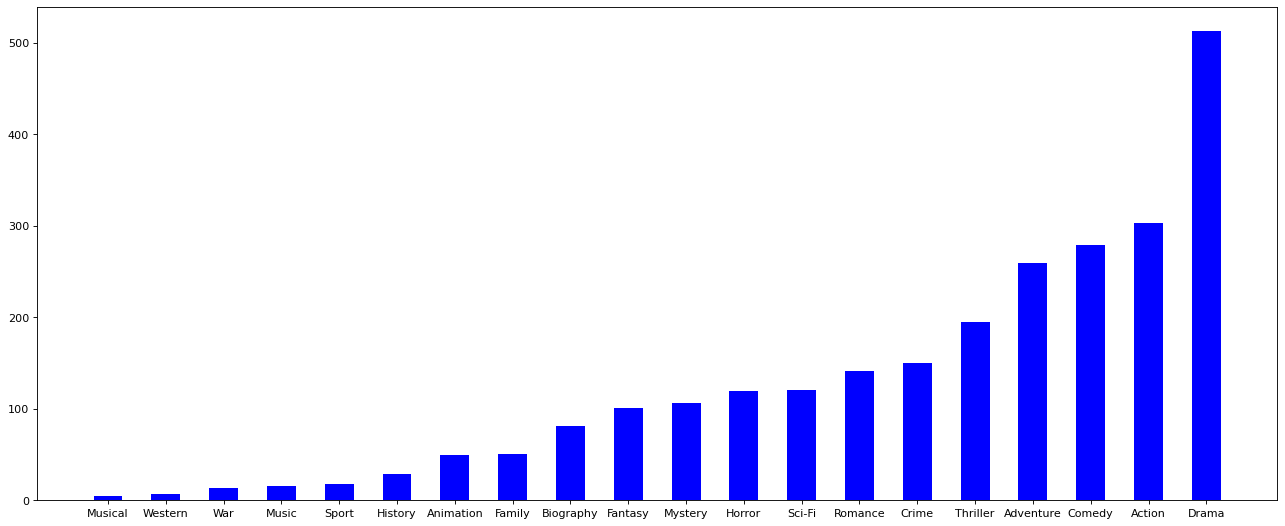

In [76]:
# 排序
print(genre_count.sort_values(ascending=True))
genre_count = genre_count.sort_values(ascending=True)
_x = genre_count.index
_y = genre_count.values

# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.5, color='blue')
plt.xticks(range(len(_x)), _x)
plt.show()